In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)
print(y_train_full.shape)


(60000, 28, 28)
(60000,)


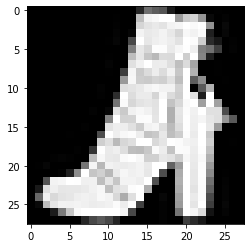

In [25]:
plt.imshow(X_train_full[11], cmap = "gray")

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])

In [9]:
model.layers

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
weights, biases = hidden1.get_weights()

print("Weights : \n", weights)
print("\nBiases : \n", biases)

Weights : 
 [[ 0.05406909 -0.02839701  0.01715018 ... -0.03199136  0.05015417
  -0.01964824]
 [-0.02843181 -0.04891974 -0.02835962 ... -0.02482365  0.02362219
  -0.06432854]
 [-0.05145923 -0.01217281 -0.01053938 ... -0.02478707  0.07312243
   0.04142133]
 ...
 [ 0.01658527  0.02615453 -0.04837434 ... -0.07392983 -0.05066882
  -0.00688369]
 [ 0.06091423 -0.01557575 -0.03267467 ...  0.06735347  0.06172644
   0.06534755]
 [ 0.06331079  0.06030567 -0.03894882 ...  0.05883878  0.05289452
   0.03930611]]

Biases : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [13]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [14]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7131 - accuracy: 0.7621 - val_loss: 0.5515 - val_accuracy: 0.8072
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4900 - accuracy: 0.8280 - val_loss: 0.4453 - val_accuracy: 0.8440
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4473 - accuracy: 0.8433 - val_loss: 0.4190 - val_accuracy: 0.8544
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4184 - accuracy: 0.8514 - val_loss: 0.4136 - val_accuracy: 0.8546
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3993 - accuracy: 0.8586 - val_loss: 0.4080 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3822 - accuracy: 0.8651 - val_loss: 0.3674 - val_accuracy: 0.8702
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3690 - accuracy: 0.8687 - val_loss: 0.3796 - val_accuracy:

In [20]:
d = history.history
print("Training :\n\tLoss : {:.5f}\n\tAccuracy : {:.5f}\n\nValidation : \n\tLoss : {:.5f}\n\tAccuracy : {:.5f}\n".format(d["loss"][-1], d["accuracy"][-1], d["val_loss"][-1], d["val_accuracy"][-1]))

Training :
	Loss : 0.22888
	Accuracy : 0.91725

Validation : 
	Loss : 0.29590
	Accuracy : 0.89500



<AxesSubplot:>

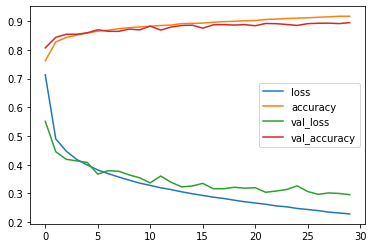

In [15]:
pd.DataFrame(history.history).plot()

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 70.2314 - accuracy: 0.8393


[70.23139953613281, 0.8392999768257141]